In [ ]:
!pip install tweepy
!pip install textblob


In [ ]:
import tweepy, re
from textblob import TextBlob
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib



consumer_key = 'hxs9wQkidefoM1l7vtnAAEOyw'
consumer_secret = 'dF6o2xly5MlMRFFEYwRnzJ75Hjz0YqtA7DcsENJyJJB0ZOpcGo'

access_token = '2176453907-KgmXS3aAD2ev26noH6AP5beXfqYiZMkoCdllL23'
access_token_secret = 'WXpIYVtfeQtXe23OCoj0n3nFu41uq9HD07ELUuBPVLnUB'

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # larger figure size

In [49]:
search_term= input("Please enter your Product or Company Name: ")
number_of_searches= float(input("How many tweets would you like to analyze?: "))

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

tweets = tweepy.Cursor(api.search,
                q=search_term, 
                lang="en", ).items(number_of_searches)
tweets = [tweet._json for tweet in tweets]

pd_tweets= []
for tweet in tweets:
    pd_tweets.append({
        "user": tweet["user"]["screen_name"],
        "text": remove_url(tweet["text"]),
        "created": str(tweet["created_at"]),
    })


sentiment_objects = [TextBlob(tweet["text"]) for tweet in pd_tweets]

sentiment_values = [tweet.sentiment.polarity for tweet in sentiment_objects]

tweets_df = pd.DataFrame(pd_tweets)
tweets_df["polarity"] = sentiment_values


tweets_df

Please enter your Product or Company Name: google
How many tweets would you like to analyze?: 100


,user,text,created,polarity
0,x_MsEmma_x,RT aftermovie AfterMovie was one of googles to...,Thu Dec 12 21:06:46 +0000 2019,0.500000
1,RobinScharpf,amazon amp Google if youre listening it would ...,Thu Dec 12 21:06:45 +0000 2019,0.800000
2,l_tyres,RT LabourRichard Labour voters across the UK a...,Thu Dec 12 21:06:45 +0000 2019,0.000000
3,rahima_do,RT KillySmithh Iphone 8 plus giveaway since i ...,Thu Dec 12 21:06:44 +0000 2019,0.000000
4,70sdisconights,NowPlaying Menergy by Patrick Cowley Find us a...,Thu Dec 12 21:06:44 +0000 2019,0.000000
...,...,...,...,...
95,ComplxAlgorithm,RT PennDusko puts on tin foil hatNobody really...,Thu Dec 12 21:06:12 +0000 2019,0.350000
96,drm50,RT vouchercodesuk Its the 12 Days of Christmas...,Thu Dec 12 21:06:12 +0000 2019,0.000000
97,istacksilver,RT PennDusko puts on tin foil hatNobody really...,Thu Dec 12 21:06:12 +0000 2019,0.350000
98,annalisaro90,RT aftermovie AfterMovie was one of googles to...,Thu Dec 12 21:06:12 +0000 2019,0.500000


In [31]:
tweets_df.nlargest(5,'polarity')

,user,text,created,polarity
34,Bobbybr80729636,RT MobileSyrup Contest Win a Bell Google Pixel 4,Thu Dec 12 20:54:24 +0000 2019,0.800000
63,April_Reign,RT MobileSyrup Contest Win a Bell Google Pixel 4,Thu Dec 12 20:54:14 +0000 2019,0.800000
89,The_KellyJay,Not that this is super effective because I sti...,Thu Dec 12 20:54:04 +0000 2019,0.577778
30,mjp_ebooks,OK Google search for podcasts subscribe to the...,Thu Dec 12 20:54:26 +0000 2019,0.500000
42,FabianRiosArias,Adventures in babysitting Damm I love that mov...,Thu Dec 12 20:54:22 +0000 2019,0.500000


In [32]:
tweets_df.nsmallest(5,'polarity')

,user,text,created,polarity
66,freakin_frankie,Me after hearing the Dirty Diana remakeGoogle ...,Thu Dec 12 20:54:13 +0000 2019,-0.600000
36,IIGalaxiasII,RT BTSVotingFam SEOUL MUSIC AWARDSKWave Award ...,Thu Dec 12 20:54:23 +0000 2019,-0.300000
59,taeteateatae,RT BTSVotingFam SEOUL MUSIC AWARDSKWave Award ...,Thu Dec 12 20:54:15 +0000 2019,-0.300000
1,davidjacksmith,Be fair Kurt shes just some port random Swede ...,Thu Dec 12 20:54:35 +0000 2019,-0.266667
29,LOLWhat31707419,sallinger Really So this never happened Idiot ...,Thu Dec 12 20:54:26 +0000 2019,-0.200000


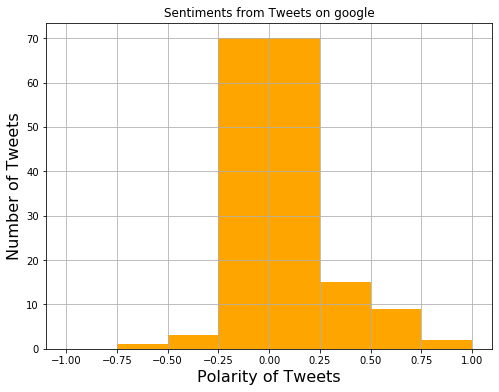

In [33]:

fig, ax = plt.subplots(figsize=(8, 6))
tweets_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="orange")
plt.xlabel("Polarity of Tweets", fontsize=16)
plt.ylabel("Number of Tweets", fontsize=16)

plt.title("Sentiments from Tweets on %s" % (search_term))
plt.show()



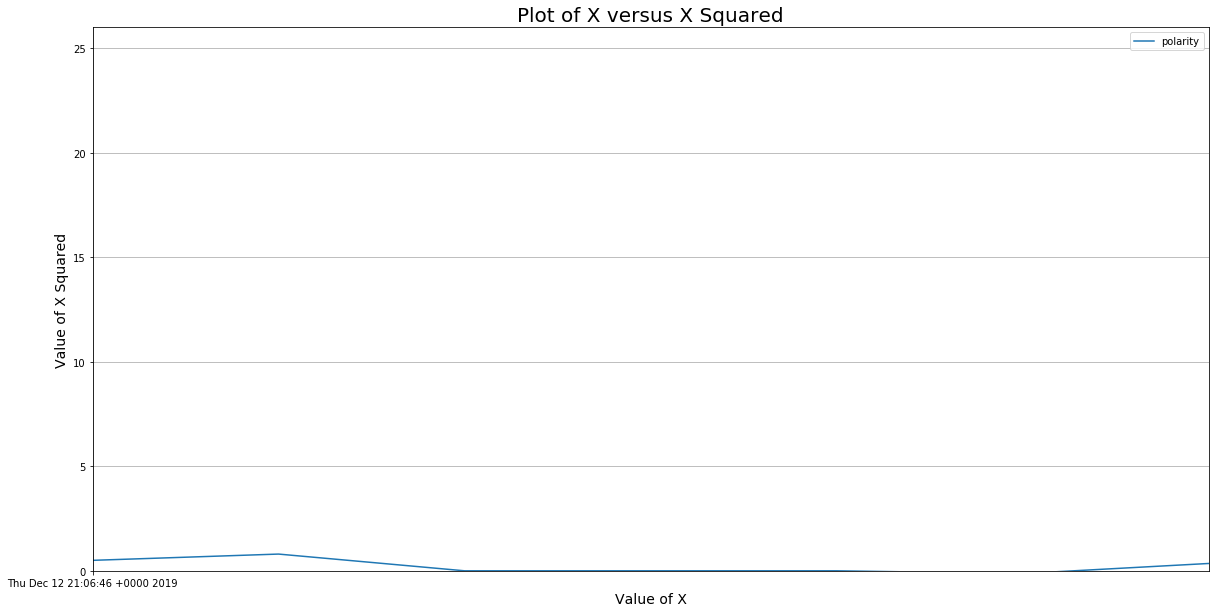

In [53]:
tweets_df.plot('created', 'polarity') # red dashes
plt.axis([0,6,0,26]) # a list in the form [xmin, xmax, ymin, ymax]
plt.xlabel("Value of X", fontsize=14)
plt.ylabel("Value of X Squared", fontsize=14)
plt.title("Plot of X versus X Squared", fontsize=20)
plt.grid(True)
plt.show()